<a href="https://colab.research.google.com/github/Farazmghm/Business-Machine-Learning-and-EDA/blob/main/weahter_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/drive/MyDrive/weather.csv')

In [5]:
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32,55,3.5,26,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2,97,8.0,86,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3,85,6.0,96,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3,83,6.0,66,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28,74,8.5,107,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [6]:
df.shape

(13200, 11)

In [7]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  int64  
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  int64  
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [9]:
df.nunique()

,0
Temperature,126
Humidity,90
Wind Speed,97
Precipitation (%),110
Cloud Cover,4
Atmospheric Pressure,5456
UV Index,15
Season,4
Visibility (km),41
Location,3


In [10]:
df.describe(include='number')

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


.Temperature:The coldest temperature ever recorded on Earth is -89.2°C (-128.6°F) at Vostok Station in Antarctica on July 21, 1983. This record was set under extremely cold conditions in one of the coldest places on Earth on the other hand The highest temperature ever recorded on Earth is 56.7°C (134°F) at Furnace Creek Ranch in Death Valley, California, USA, on July 10, 1913. This temperature was recorded during an extreme heatwave in one of the hottest places on Earth.

.Humidity:In very dry environments, such as deserts, relative humidity can drop as low as 1-5%. These conditions are typically seen in arid regions like the Sahara Desert on the other hand  In highly humid environments, relative humidity can reach 100%, which occurs in tropical rainforests and during periods of heavy rainfall or fog.

. wind speed:wind speeds can be very low, nearly 0 km/h (0 mph). This often occurs in very calm weather or during periods of high pressureon the other hand wind speeds

.Precipitation:annual precipitation can be extremely low, sometimes as little as 2-10 mm (0.08-0.4 inches) per year. The Atacama Desert in Chile, for example, has some areas where annual rainfall is less than 1 mm (0.04 inches) on the other hand  The highest recorded annual precipitation is in Mawsynram, India, which receives approximately 467.4 inches (11,871 mm) of rain annually. This region is known for its intense monsoon rains.

.Atmospheric Pressure:These extremes are rare and typically associated with severe weather phenomena. In everyday conditions, atmospheric pressure usually ranges between 980 hPa and 1050 hPa
.UV Index: Low (0-2): Minimal risk of harm from unprotected sun exposure. You can safely be outside with minimal protection on the other hand  Extreme risk of harm. Avoid outdoor activities during peak sunlight hours and take all protective measures.
.Visibility:Visibility can drop to less than 1 km (0.6 miles) on the other hand Under optimal conditions, such as on a clear day with no obstructions, visibility can extend to over 100 km (62 miles)


In [11]:
def include_number(df):
  return df.select_dtypes(include='number')
numeric_df = include_number(df)
for column in numeric_df:
  mean= np.mean(numeric_df[column])
  std= np.std(numeric_df[column],ddof=1)
  lower=mean-std
  upper=mean+std
  print(f"Lower bound for {column}: {lower}")
  print(f"Upper bound for {column}: {upper}\n")




Lower bound for Temperature: 1.7412491752149712
Upper bound for Temperature: 36.51390233993655

Lower bound for Humidity: 48.51658524269728
Upper bound for Humidity: 88.90508142396936

Lower bound for Wind Speed: 2.9234928281656742
Upper bound for Wind Speed: 16.740901111228265

Lower bound for Precipitation (%): 21.69785316941256
Upper bound for Precipitation (%): 85.59093470937532

Lower bound for Atmospheric Pressure: 968.628307514618
Upper bound for Atmospheric Pressure: 1043.0274849096245

Lower bound for UV Index: 0.14915721432887485
Upper bound for UV Index: 7.862357937186276

Lower bound for Visibility (km): 2.0914177563127176
Upper bound for Visibility (km): 8.834415577020616



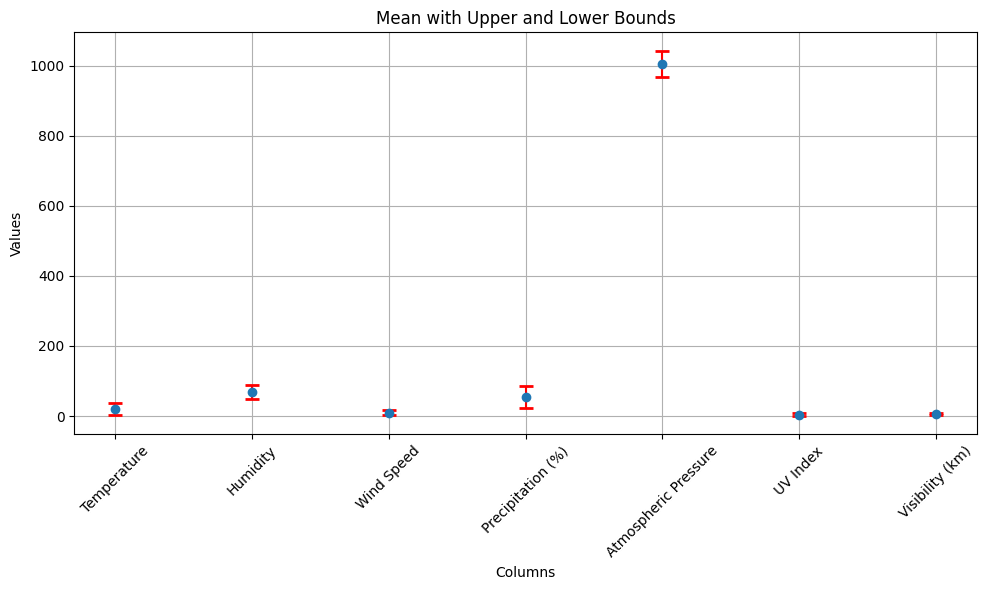

In [12]:
columns = []
means = []
lower_bounds = []
upper_bounds = []

# Calculate mean, lower, and upper bounds for each column
for column in numeric_df.columns:
    mean = np.mean(numeric_df[column])
    std = np.std(numeric_df[column], ddof=1)
    lower = mean - std
    upper = mean + std


    columns.append(column)
    means.append(mean)
    lower_bounds.append(lower)
    upper_bounds.append(upper)


means = np.array(means)
lower_bounds = np.array(lower_bounds)
upper_bounds = np.array(upper_bounds)


plt.figure(figsize=(10, 6))
plt.errorbar(columns, means, yerr=[means - lower_bounds, upper_bounds - means],
             fmt='o', ecolor='r', capsize=5, capthick=2)
plt.xticks(rotation=45)
plt.title('Mean with Upper and Lower Bounds')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.tight_layout()

plt.show()

.As can be seen from the plot, the reliable values for each numerical column are most likely to fall within the range indicated by the error bars (mean ± standard deviation). This range provides a useful estimate of where the majority of the data lies, allowing you to understand the variability and reliability of the data in each column.

By observing these ranges, you can make informed decisions or predictions based on the data, understanding that values outside these ranges are less common but still possible.

In [13]:
df.isnull().sum().sort_values(ascending=False)

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [14]:
df.duplicated().sum()

0

In [15]:

def check_distribution(df):
    return df.select_dtypes(include='number')

# Correctly call the function to get the numeric DataFrame
numeric_df = check_distribution(df)

# Loop through each numeric column and calculate skewness
for column in numeric_df.columns:
    skew = numeric_df[column].skew()
    kurtosis=numeric_df[column].kurtosis()
    print(f"Skewness of {column}: {skew}")
    print(f"Kurtosis of {column}: {kurtosis}")


Skewness of Temperature: 0.2217414467117672
Kurtosis of Temperature: 0.5860506310497562
Skewness of Humidity: -0.40161426558981855
Kurtosis of Humidity: -0.3383655678199289
Skewness of Wind Speed: 1.3602625756285232
Kurtosis of Wind Speed: 3.2551937305080476
Skewness of Precipitation (%): -0.15245706717664612
Kurtosis of Precipitation (%): -1.3540385630154042
Skewness of Atmospheric Pressure: -0.2938986063675234
Kurtosis of Atmospheric Pressure: 12.778070638266067
Skewness of UV Index: 0.9000101823909895
Kurtosis of UV Index: -0.3621660221973291
Skewness of Visibility (km): 1.2332751645049822
Kurtosis of Visibility (km): 2.5172751034703222


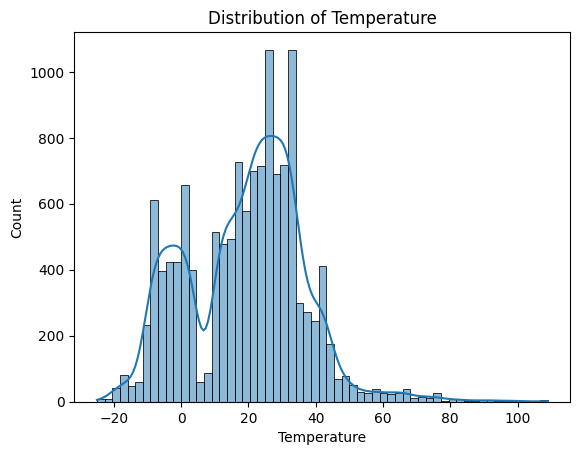

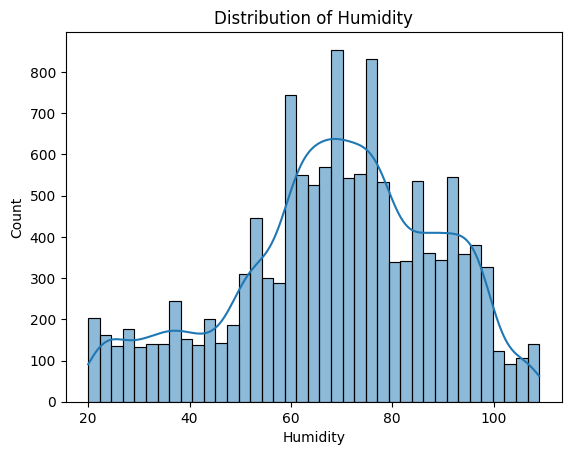

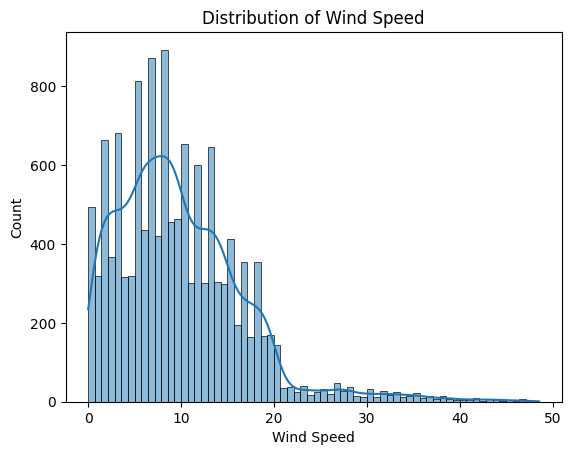

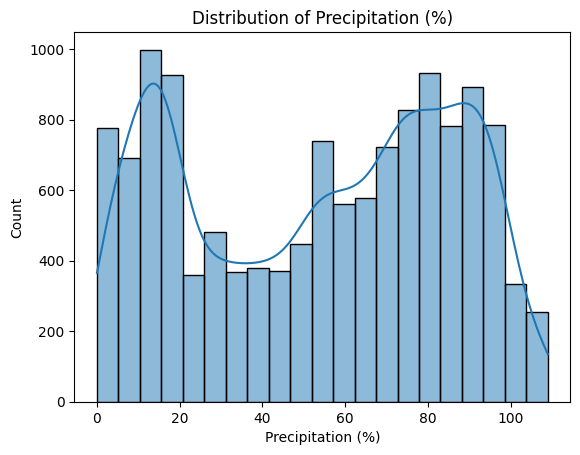

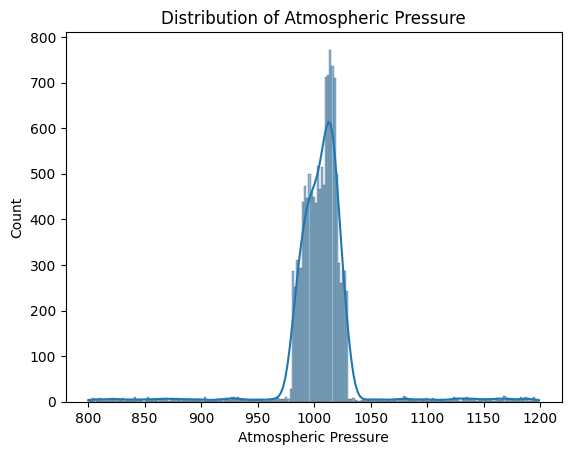

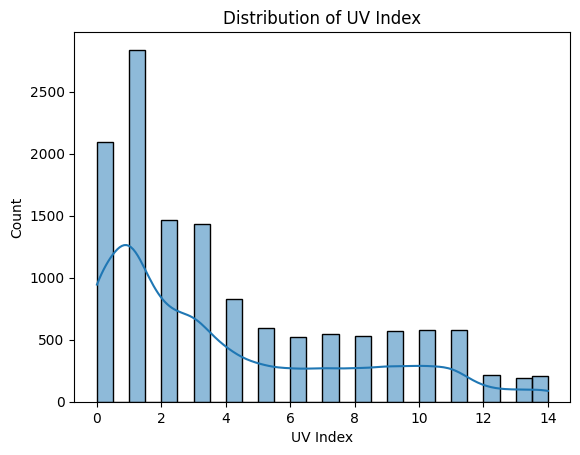

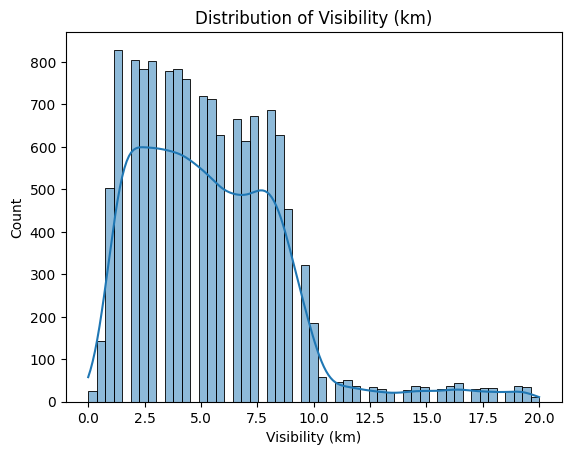

In [16]:
def check_distribution(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            sns.histplot(df[column], kde=True)  # Adding kde=True for a smoother curve
            plt.title(f'Distribution of {column}')
            plt.show()

# Call the function with your DataFrame `df`
check_distribution(df)


All skewness and kurtosis values fall within the normal range, indicating balanced distributions, except for the kurtosis of "Atmospheric Pressure," which is significantly high. This suggests a heavy-tailed distribution, meaning there are more extreme outliers or a sharper peak than in a normal distribution.And the other hand our distributions are NOT Normal


In [21]:
from scipy.stats import zscore
def check_Outliers(df):
    return df.select_dtypes(include='number')

numeric_df = check_Outliers(df)


for column in numeric_df.columns:
    z_scores = zscore(numeric_df[column])
    print(f"Z-Score of {column}: {z_scores}")

Z-Score of Temperature: 0       -0.294931
1        1.143035
2        0.625367
3        1.085516
4        0.452811
           ...   
13195   -0.525006
13196   -1.157711
13197    0.625367
13198   -0.927636
13199   -1.387785
Name: Temperature, Length: 13200, dtype: float64
Z-Score of Humidity: 0        0.212404
1        1.351385
2       -0.233285
3        0.707613
4        0.261924
           ...   
13195    0.261924
13196    0.360966
13197    0.410487
13198    0.360966
13199   -1.520829
Name: Humidity, Length: 13200, dtype: float64
Z-Score of Wind Speed: 0       -0.048086
1       -0.192836
2       -0.409962
3       -1.206089
4        1.037543
           ...   
13195    0.675666
13196   -0.916588
13197   -0.627087
13198    0.024290
13199   -1.423215
Name: Wind Speed, Length: 13200, dtype: float64
Z-Score of Precipitation (%): 0        0.887629
1        0.543291
2       -1.178401
3        0.887629
4        0.386773
           ...   
13195    0.543291
13196   -0.959276
13197   -0.802759
131

In [23]:
def find_outliers(df):
   return df.select_dtypes(include='number')

numeric_df = check_Outliers(df)
for column in numeric_df.columns:
  column=numeric_df[column]
  Q1=column.quantile(0.25)
  Q3=column.quantile(0.75)
  IQR=Q3-Q1
  Lower=Q1-1.5*IQR
  upper=Q3+1.5+IQR
  outleirs=column[(column<lower)|(column>upper)]
  print(f"Outliers in {column}:{outleirs}")

Outliers in 0        14
1        39
2        30
3        38
4        27
         ..
13195    10
13196    -1
13197    30
13198     3
13199    -5
Name: Temperature, Length: 13200, dtype: int64:6        -2
13      -10
20      -10
21       -7
31        2
         ..
13181    -7
13182    -7
13193    -5
13196    -1
13199    -5
Name: Temperature, Length: 3218, dtype: int64
Outliers in 0        73
1        96
2        64
3        83
4        74
         ..
13195    74
13196    76
13197    77
13198    76
13199    38
Name: Humidity, Length: 13200, dtype: int64:Series([], Name: Humidity, dtype: int64)
Outliers in 0         9.5
1         8.5
2         7.0
3         1.5
4        17.0
         ... 
13195    14.5
13196     3.5
13197     5.5
13198    10.0
13199     0.0
Name: Wind Speed, Length: 13200, dtype: float64:3         1.5
11        2.0
17        0.5
18        0.5
25        1.0
         ... 
13172     0.5
13176    36.0
13179     1.5
13181     0.5
13199     0.0
Name: Wind Speed, Length: 1974, dt

Outliers in Temperature:
210      78
228      73
535      80
709      74
730      76
         ..
12752    90
12814    72
12878    95
13065    97
13108    81
Name: Temperature, Length: 92, dtype: int64


Outliers in Humidity:
Series([], Name: Humidity, dtype: int64)


Outliers in Wind Speed:
63       46.5
90       28.5
123      28.0
208      34.0
228      47.0
         ... 
12999    28.5
13066    31.0
13113    32.5
13115    26.5
13176    36.0
Name: Wind Speed, Length: 404, dtype: float64


Outliers in Precipitation (%):
Series([], Name: Precipitation (%), dtype: int64)


Outliers in Atmospheric Pressure:
10        879.88
38       1132.20
58       1074.07
72       1063.39
85       1160.48
          ...   
13167     840.06
13168     894.65
13178     822.40
13184    1128.35
13196    1067.23
Name: Atmospheric Pressure, Length: 927, dtype: float64


Outliers in UV Index:
Series([], Name: UV Index, dtype: int64)


Outliers in Visibility (km):
38       16.5
113      17.5
134      17.0
300     

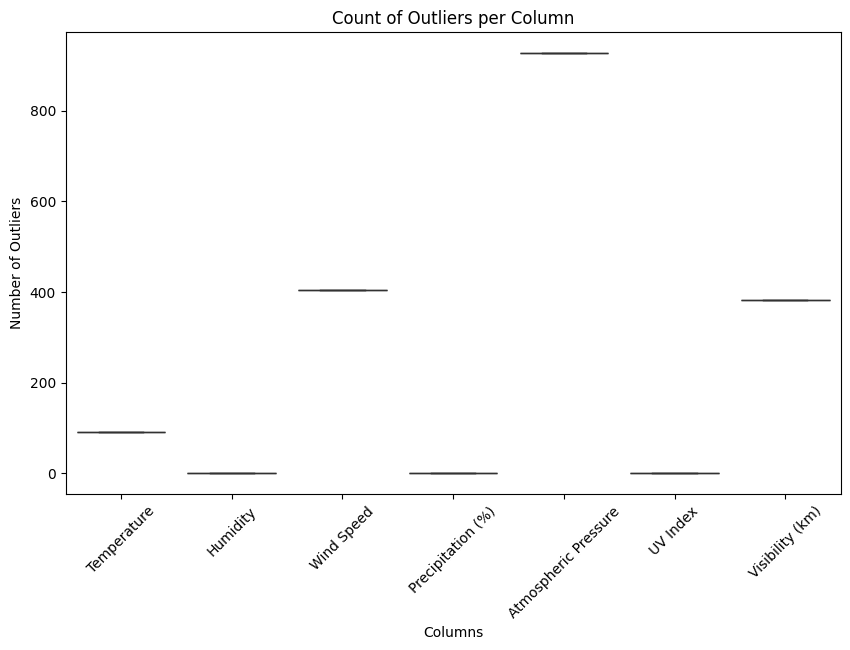

In [27]:
outlier_counts = {}
for column in numeric_df.columns:
    col_data = numeric_df[column]
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    Lower = Q1 - 1.5 * IQR
    Upper = Q3 + 1.5 * IQR
    outliers = col_data[(col_data < Lower) | (col_data > Upper)]

    # Store the count of outliers
    outlier_counts[column] = len(outliers)

    print(f"Outliers in {column}:")
    print(outliers)
    print("\n")

# Create a count plot of the number of outliers per column
plt.figure(figsize=(10, 6))
sns.boxplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()), palette="viridis")
plt.xticks(rotation=45)
plt.title('Count of Outliers per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.show()

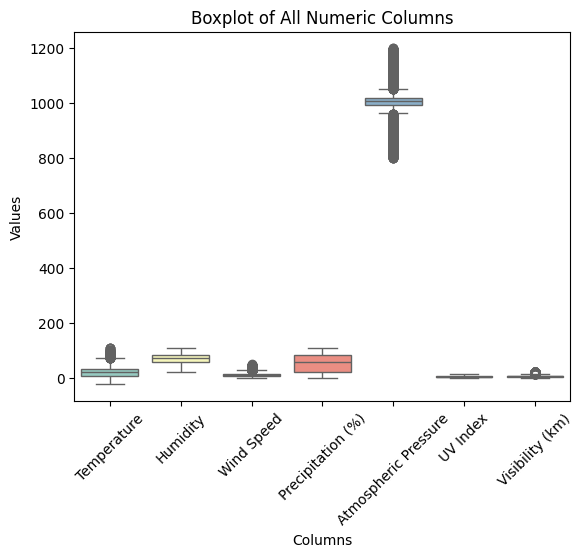

In [30]:
sns.boxplot(data=numeric_df, palette="Set3")
plt.xticks(rotation=45)
plt.title('Boxplot of All Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [31]:
def remove_outliers(df):
    # Create a copy of the DataFrame to avoid modifying the original one
    df_clean = df.copy()

    # Iterate over each numeric column to identify and remove outliers
    for column in df_clean.select_dtypes(include='number').columns:
        col_data = df_clean[column]
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out rows where the column value is outside the bounds
        df_clean = df_clean[(col_data >= lower_bound) & (col_data <= upper_bound)]

    return df_clean

# Example usage:
df_cleaned = remove_outliers(df)

# Optionally, check the shape of the DataFrame before and after
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (13200, 11)
Cleaned DataFrame shape: (11586, 11)


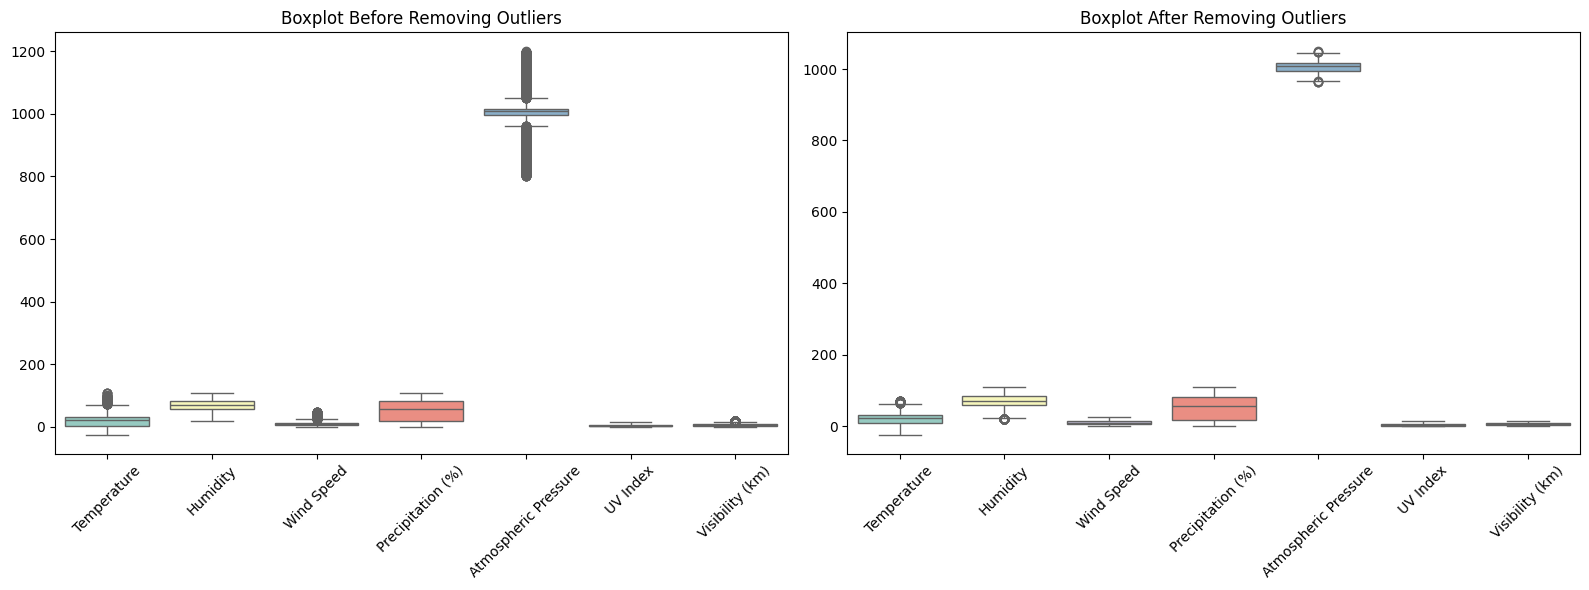

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot before removing outliers
sns.boxplot(data=numeric_df, palette="Set3", ax=axes[0])
axes[0].set_title('Boxplot Before Removing Outliers')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot after removing outliers
sns.boxplot(data=df_cleaned.select_dtypes(include='number'), palette="Set3", ax=axes[1])
axes[1].set_title('Boxplot After Removing Outliers')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()